<a href="https://colab.research.google.com/github/Lokeshkonga3/PREDICTING-SALES-ANALYSIS-ON-ADVERTISING-DATASET/blob/main/Task_1_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas
!pip install numpy

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Advertising.csv to Advertising.csv


In [ ]:

  df = pd.read_csv('Advertising.csv')

  print(df.head())
  print(df.info())

   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None


In [ ]:
X = df[['TV']]
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")

Intercept: 7.119638430592953
Coefficient: 0.046529733705443346


In [ ]:
y_pred = model.predict(X_test)
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df.head())

     Actual  Predicted
95     16.9  14.717944
15     22.4  16.211548
30     21.4  20.748197
158     7.3   7.664036
128    24.7  17.370139


In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 10.20
R² Score: 0.68


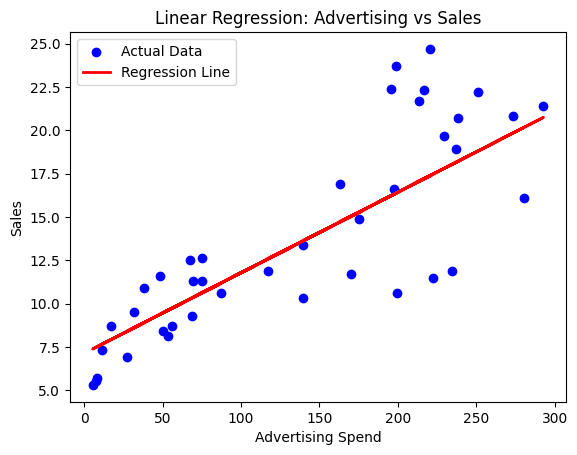

In [ ]:
plt.scatter(X_test, y_test, label="Actual Data", color="blue")
plt.plot(X_test, y_pred, label="Regression Line", color="red", linewidth=2)
plt.xlabel("Advertising Spend")
plt.ylabel("Sales")
plt.title("Linear Regression: Advertising vs Sales")
plt.legend()
plt.show()

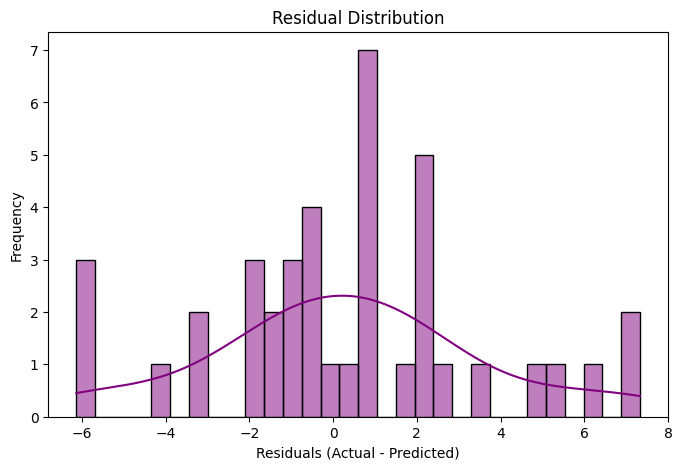

In [ ]:
import seaborn as sns
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True, color="purple")
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()

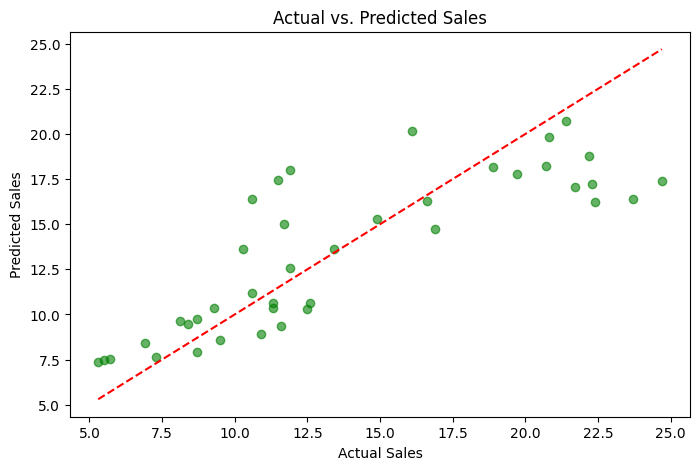

In [ ]:
  plt.figure(figsize=(8, 5))
  plt.scatter(y_test, y_pred, color="green", alpha=0.6)
  plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='dashed', color='red')  # Reference line
  plt.xlabel("Actual Sales")
  plt.ylabel("Predicted Sales")
  plt.title("Actual vs. Predicted Sales")
  plt.show()

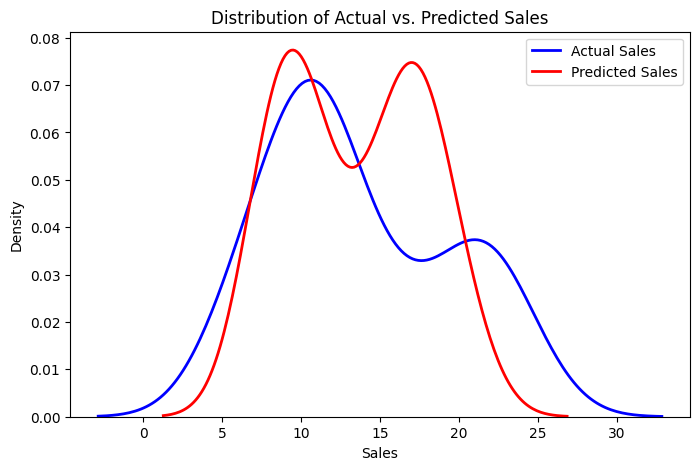

In [ ]:
plt.figure(figsize=(8,5))
sns.kdeplot(y_test, color="blue", label="Actual Sales", linewidth=2)
sns.kdeplot(y_pred, color="red", label="Predicted Sales", linewidth=2)
plt.xlabel("Sales")
plt.ylabel("Density")
plt.title("Distribution of Actual vs. Predicted Sales")
plt.legend()
plt.show()

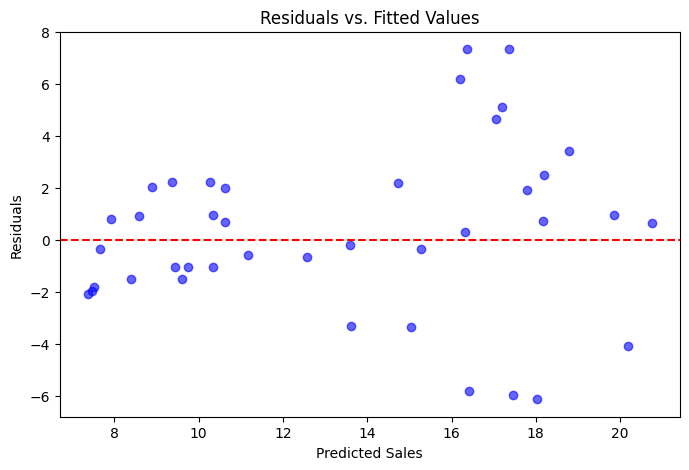

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(y_pred, residuals, color="blue", alpha=0.6)
plt.axhline(y=0, color='red', linestyle='dashed')
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values")
plt.show()